In [1]:
!pip install pandas

In [1]:
import pandas as pd

with open('tm003.txt') as f:
    lines = f.readlines()

data = []
######
for line in lines:
    parts = line.strip().split()
    date = parts[0]
    time = parts[1]
    sensor = parts[2]
    status = parts[3]
    activity = parts[4]
    data.append([date, time, sensor, status, activity])

df = pd.DataFrame(data, columns=["date", "time", "sensor", "status", "activity"])
df
######

,date,time,sensor,status,activity
0,2016-11-22,14:16:13.921451,KitchenASink,OFF,Other_Activity
1,2016-11-22,14:16:30.988661,KitchenASink,ON,Entertain_Guests
2,2016-11-22,14:16:32.862365,KitchenASink,OFF,Entertain_Guests
3,2016-11-22,14:16:34.363531,KitchenASink,ON,Entertain_Guests
4,2016-11-22,14:16:35.488014,KitchenASink,OFF,Entertain_Guests
...,...,...,...,...,...
209090,2017-01-31,21:08:08.285146,BedroomABed,OFF,Sleep
209091,2017-01-31,21:08:43.343460,BedroomABed,ON,Sleep
209092,2017-01-31,21:08:45.591459,BedroomABed,OFF,Sleep
209093,2017-01-31,21:40:56.793067,BedroomABed,ON,Sleep


In [4]:
save = df

In [5]:
df = save
df
newdf = df[df['date'] == "2016-11-22"]
newdf


,date,time,sensor,status,activity
0,2016-11-22,14:16:13.921451,KitchenASink,OFF,Other_Activity
1,2016-11-22,14:16:30.988661,KitchenASink,ON,Entertain_Guests
2,2016-11-22,14:16:32.862365,KitchenASink,OFF,Entertain_Guests
3,2016-11-22,14:16:34.363531,KitchenASink,ON,Entertain_Guests
4,2016-11-22,14:16:35.488014,KitchenASink,OFF,Entertain_Guests
...,...,...,...,...,...
1778,2016-11-22,22:24:41.278961,BedroomABed,OFF,Sleep
1779,2016-11-22,23:06:09.849293,BedroomABed,ON,Sleep
1780,2016-11-22,23:06:10.977619,BedroomABed,OFF,Sleep
1781,2016-11-22,23:06:20.208506,BedroomAArea,ON,Sleep


In [42]:
df = newdf



# Assume your activity switch DataFrame is named `activitydf`
activitydf = df
activitydf['activity_block'] = (activitydf['activity'] != activitydf['activity'].shift()).cumsum()
activitydf = df[df['activity'] != df['activity'].shift()].reset_index(drop=True)

# Make sure timestamp is in datetime format
activitydf['time'] = pd.to_datetime(activitydf['time'])

# Calculate duration until the next activity
activitydf['time'] = activitydf['time'].shift(-1) - activitydf['time']

# Optional: convert to seconds
activitydf['time'] = activitydf['time'].dt.total_seconds()
#activitydf['time'] = pd.to_timedelta(activitydf['time'], unit='s')

counts = df['activity_block'].value_counts().sort_index().reset_index(drop=True)
activitydf['activity_num'] = counts

activitydf

    

C:\Users\standard\AppData\Local\Temp\ipykernel_12544\3207273191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activitydf['activity_block'] = (activitydf['activity'] != activitydf['activity'].shift()).cumsum()
C:\Users\standard\AppData\Local\Temp\ipykernel_12544\3207273191.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  activitydf['time'] = pd.to_datetime(activitydf['time'])


,date,time,sensor,status,activity,activity_block,activity_num
0,2016-11-22,17.067210,KitchenASink,OFF,Other_Activity,1,1
1,2016-11-22,3567.171792,KitchenASink,ON,Entertain_Guests,2,938
2,2016-11-22,43.286588,MainDoor,OPEN,Other_Activity,3,6
3,2016-11-22,310.573593,BathroomAArea,ON,Personal_Hygiene,4,104
4,2016-11-22,2175.226226,OfficeAArea,ON,Other_Activity,5,12
5,2016-11-22,2173.027948,KitchenASink,ON,Drink,6,42
6,2016-11-22,21.174662,HallwayA,ON,Other_Activity,7,4
7,2016-11-22,265.105588,BathroomAArea,ON,Personal_Hygiene,8,130
8,2016-11-22,266.735860,HallwayA,ON,Other_Activity,9,2
9,2016-11-22,2.891723,MainEntryway,ON,Leave_Home,10,2


In [8]:
!pip install imageio
!pip install matplotlib

     ------------------------------------ 315.8/315.8 KB 651.5 kB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 782.8 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\standard\Desktop\Spring Project\tm03env\Scripts\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 7.8/7.8 MB 312.9 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 1.5/1.5 MB 645.0 kB/s eta 0:00:00
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
     ------------------------------------ 111.1/111.1 KB 539.5 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\standard\Desktop\Spring Project\tm03env\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Draw the overlay (house map)
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import time
import imageio
def draw_overlay(current_room, current_action, time_str=None):
    path = "house_layout.jpg"
    overlay_width, overlay_height = 553, 485

    background = cv2.imread(path)
    background = cv2.resize(background, (overlay_width, overlay_height))


    overlay = background.copy()
    rooms = {
        "BedroomA": (76, 356, 198, 127),
        "Closet": (76, 290, 76, 66),
        "BathroomA": (153, 290, 58, 66),
        "BedroomB": (9, 153, 126, 125),
        "OfficeA": (136, 153, 130, 126),
        "LivingRoomA": (339, 141, 194, 137),
        "KitchenA": (401, 25, 131, 113),
        "BathroomB": (107, 25, 79, 87),
        "UtilityRoomA": (9, 26, 96, 86),
        "DiningA": (270, 26, 91, 90),
        "Garage": (340, 360, 198, 120)
    }

    # Draw rooms
    for room_name, (x, y, w, h) in rooms.items():
        color = (154, 205, 50)  # light green
        thickness = -1  # filled
        if room_name in current_room:
            color = (0, 165, 255)  # orange for current room
            thickness = -1
            # Add thick border around current room
            cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 0, 255), 3)  # red border
        cv2.rectangle(overlay, (0,0), (553, 28), (80, 80, 80), -1)
        cv2.putText(overlay, "Activity: " + current_action, (10, 22), cv2.FONT_HERSHEY_SIMPLEX, .8, (80, 255, 80), 1)
        

    # Draw the time string
    if time_str:
        cv2.putText(overlay, f"Time: {time_str}", (350, 22),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 60, 255), 1)

    return overlay

output = draw_overlay("Closet", "Walking", time_str=round(17.06721,2))

# Convert from BGR to RGB for displaying with matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

#plt.imshow(output_rgb)
#plt.axis('off')
#plt.show()
frames = []
for _, row in activitydf.iterrows():
    current_room = row['sensor']         # or whatever your column is called
    current_action = row['activity']   # adjust column names as needed
    time_str = row['time']             # or 'Timestamp' if that's what you use

    # Generate overlay image
    overlay = draw_overlay(current_room, current_action, round(time_str, 2))

    rgb_overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    # Append frame
    frames.append(rgb_overlay)
#cv2.destroyAllWindows()
imageio.mimsave("tm003.gif", frames, fps=2)

ModuleNotFoundError: No module named 'matplotlib'

In [13]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\standard\Desktop\Spring Project\tm03env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

with open('tm003.txt') as f:
    lines = f.readlines()

data = []
######
for line in lines:
    parts = line.strip().split()
    date = parts[0]
    time = parts[1]
    sensor = parts[2]
    status = parts[3]
    activity = parts[4]
    data.append([date, time, sensor, status, activity])

df = pd.DataFrame(data, columns=["date", "time", "sensor", "status", "activity"])
#df
######

df = df[df['date'] == "2016-11-22"]
#newdf


# Assume your activity switch DataFrame is named `activitydf`
activitydf = df
activitydf['activity_block'] = (activitydf['activity'] != activitydf['activity'].shift()).cumsum()
activitydf = df[df['activity'] != df['activity'].shift()].reset_index(drop=True)

# Make sure timestamp is in datetime format
activitydf['time'] = pd.to_datetime(activitydf['time'])

# Calculate duration until the next activity
activitydf['time'] = activitydf['time'].shift(-1) - activitydf['time']

# Optional: convert to seconds
activitydf['time'] = activitydf['time'].dt.total_seconds()
#activitydf['time'] = pd.to_timedelta(activitydf['time'], unit='s')

counts = df['activity_block'].value_counts().sort_index().reset_index(drop=True)
activitydf['activity_num'] = counts

activitydf

    

ModuleNotFoundError: No module named 'pandas'

C:\Users\standard\AppData\Local\Temp\ipykernel_12544\4130095212.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlOrRd')


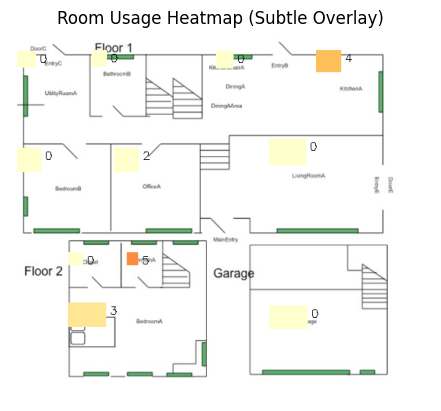

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Sensor to Room mapping (update as needed for your data)
sensor_to_room = {
    'KitchenASink': 'KitchenA',
    'KitchenAArea': 'KitchenA',
    'DiningAArea': 'DiningA',
    'BathroomAArea': 'BathroomA',
    'BedroomABed': 'BedroomA',
    'BedroomAArea': 'BedroomA',
    'BedroomADoor': 'BedroomA',
    'OfficeAArea': 'OfficeA',
    'LivingRoomAArea': 'LivingRoomA',
    'BathroomBLight': 'BathroomB',
    'UtilityRoomA': 'UtilityRoomA',
    'ClosetDoor': 'Closet',
    'GarageLight': 'Garage',
    'BedroomBArea': 'BedroomB',
    'MainDoor': 'Entry',           # not drawn but harmless
    'MainEntryway': 'Entry',       # optional if Entry not drawn
}

# Room coordinates (x, y, w, h)
rooms = {
    "BedroomA": (76, 356, 198, 127),
    "Closet": (76, 290, 76, 66),
    "BathroomA": (153, 290, 58, 66),
    "BedroomB": (9, 153, 126, 125),
    "OfficeA": (136, 153, 130, 126),
    "LivingRoomA": (339, 141, 194, 137),
    "KitchenA": (401, 25, 131, 113),
    "BathroomB": (107, 25, 79, 87),
    "UtilityRoomA": (9, 26, 96, 86),
    "DiningA": (270, 26, 91, 90),
    "Garage": (340, 360, 198, 120)
}

df = activitydf

# Assuming df is already loaded and has 'sensor'
df['room'] = df['sensor'].map(sensor_to_room)
room_counts = df['room'].value_counts()

# Load and resize background
background = cv2.imread("house_layout.jpg")
background = cv2.resize(background, (553, 485))
overlay = background.copy()

# Colormap setup
max_count = room_counts.max()
min_count = room_counts.min()
colormap = cm.get_cmap('YlOrRd')

# Updated rectangle: smaller overlay (25% of original room)
for room_name, (x, y, w, h) in rooms.items():
    count = room_counts.get(room_name, 0)
    norm = (count - min_count) / (max_count - min_count) if max_count != min_count else 0
    color = colormap(norm)
    bgr = tuple(int(255 * c) for c in color[:3][::-1])
    
    # Draw a small square in top-left of the room
    small_w, small_h = int(w * 0.25), int(h * 0.25)

    cv2.rectangle(overlay, (x, y), (x + small_w, y + small_h), bgr, -1)

    # Optional: put count label beside the square
    cv2.putText(overlay, str(count), (x + small_w + 5, y + 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (10, 10, 10), 1)

# Save and show
cv2.imwrite("room_heatmap_subtle.jpg", overlay)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Room Usage Heatmap (Subtle Overlay)")
plt.show()



C:\Users\standard\AppData\Local\Temp\ipykernel_12544\3855080369.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlOrRd')


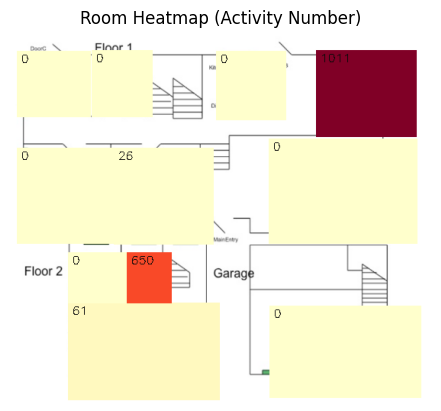

In [55]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Sensor to Room mapping
sensor_to_room = {
    'KitchenASink': 'KitchenA',
    'KitchenAArea': 'KitchenA',
    'DiningAArea': 'DiningA',
    'BathroomAArea': 'BathroomA',
    'BedroomABed': 'BedroomA',
    'BedroomAArea': 'BedroomA',
    'BedroomADoor': 'BedroomA',
    'OfficeAArea': 'OfficeA',
    'LivingRoomAArea': 'LivingRoomA',
    'BathroomBLight': 'BathroomB',
    'UtilityRoomA': 'UtilityRoomA',
    'ClosetDoor': 'Closet',
    'GarageLight': 'Garage',
    'BedroomBArea': 'BedroomB',
    'MainDoor': 'Entry',
    'MainEntryway': 'Entry',
}

# Room coordinates on background image
rooms = {
    "BedroomA": (76, 356, 198, 127),
    "Closet": (76, 290, 76, 66),
    "BathroomA": (153, 290, 58, 66),
    "BedroomB": (9, 153, 126, 125),
    "OfficeA": (136, 153, 130, 126),
    "LivingRoomA": (339, 141, 194, 137),
    "KitchenA": (401, 25, 131, 113),
    "BathroomB": (107, 25, 79, 87),
    "UtilityRoomA": (9, 26, 96, 86),
    "DiningA": (270, 26, 91, 90),
    "Garage": (340, 360, 198, 120)
}

# Use activitydf with activity_num column
df = activitydf.copy()
df['room'] = df['sensor'].map(sensor_to_room)

# Sum activity_num for each room
room_activity_sum = df.groupby('room')['activity_num'].sum()

# Load background image
background = cv2.imread("house_layout.jpg")
background = cv2.resize(background, (553, 485))
overlay = background.copy()

# Normalize activity values
max_count = room_activity_sum.max()
min_count = room_activity_sum.min()
colormap = cm.get_cmap('YlOrRd')

# Draw heatmap overlays
for room_name, (x, y, w, h) in rooms.items():
    count = room_activity_sum.get(room_name, 0)
    norm = (count - min_count) / (max_count - min_count) if max_count != min_count else 0
    color = colormap(norm)
    bgr = tuple(int(255 * c) for c in color[:3][::-1])

    # Draw a small square overlay in each room
    #small_w, small_h = int(w * 0.25), int(h * 0.25)
    #cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 0, 255), 3)
    cv2.rectangle(overlay, (x, y), (x + w, y + h), bgr, -1)

    # Optional label: display the count
    cv2.putText(overlay, str(int(count)), (x + 5, y + 15),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (10, 10, 10), 1)

# Save and display
cv2.imwrite("room_heatmap_activity_num.jpg", overlay)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Room Heatmap (Activity Number)")
plt.show()
